In [2]:
from exp.plot_config import *
import pandas as pd

In [10]:
df = pd.read_csv('dataset/raw/Cases by age groups.csv')
age_columns = [
    col for col in df.columns if col not in ['end_of_week', 'Overall']
]

df['end_of_week'] = pd.to_datetime(df['end_of_week'])
start_date = pd.to_datetime('2020-03-01')
end_date = pd.to_datetime('2022-12-31')
df = df[(df['end_of_week']>=start_date) & (df['end_of_week']<=end_date)]

df.head(2)

,end_of_week,UNDER5,AGE1829,AGE3039,AGE4049,AGE5064,AGE6574,AGE75PLUS,AGE517,Overall
0,2020-03-07,39.0,751.0,1042.0,1278.0,2466.0,1172.0,860.0,160.0,7768.0
1,2020-03-14,139.0,4366.0,5171.0,5650.0,9187.0,4066.0,2654.0,482.0,31715.0


In [13]:
plt.rc('legend', fontsize=20)    # legend fontsize

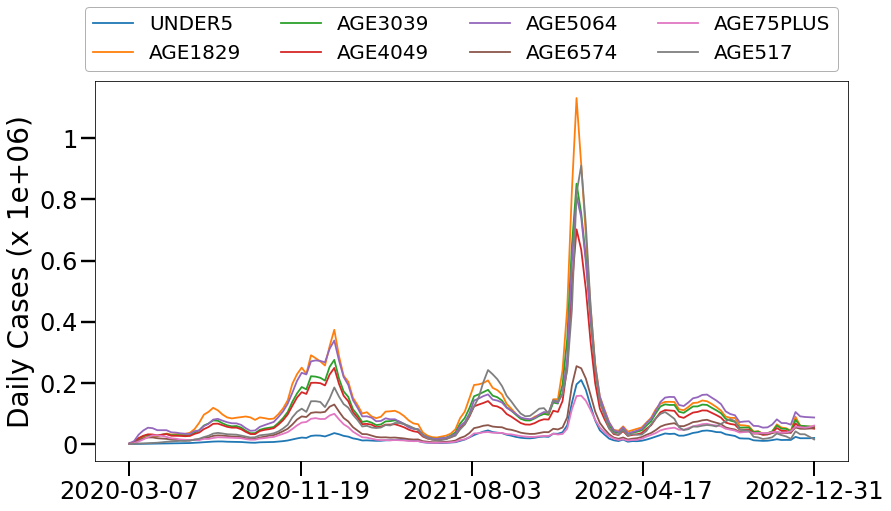

In [34]:
scale = 1e6
fig, ax = plt.subplots(figsize=(13.5, 7))
x_column = 'end_of_week'

prop_cycle = iter(plt.rcParams["axes.prop_cycle"])
for index, age_column in enumerate(age_columns):
    plt.plot(
        df[x_column], df[age_column], 
        color=next(prop_cycle)["color"], 
        label=age_column, linewidth=1.8
    )

# _, y_max = ax.get_ylim()
# ax.set_ylim(0, y_max*1.05)
# ax.set_ylim(0)

# set fixed number of x axis ticks
x_first_tick = df[x_column].min()
x_last_tick = df[x_column].max()
x_major_ticks = DATE_TICKS
ax.set_xticks(
    [x_first_tick + (x_last_tick - x_first_tick) * i / (x_major_ticks - 1) \
        for i in range(x_major_ticks)]
)

# ax.set_yscale('log')  
ax.yaxis.set_major_formatter(get_formatter(scale))
unit = f'x {scale:.0e}'
plt.ylabel(f'Daily Cases ({unit})')
plt.legend(framealpha=0.3, edgecolor="black", ncol=4, bbox_to_anchor = (1, 1.22))
plt.savefig(
    'results/weekly_ground_truth.jpg', 
    dpi=200, bbox_inches="tight"
)
plt.show()